# neural network 

In [2]:
import numpy as np

In [3]:
# each row is a training example, each column is a feature [X1,X2,X3]
X = np.array(([0,0,1],[0,1,1],[1,0,1],[1,1,1]), dtype=float)
y = np.array(([0],[1],[1],[0]), dtype=float)

print(X)
print('Shape of X =',X.shape)
print(15*'-')
print(y)
print('Shape of y =',y.shape)

[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Shape of X = (4, 3)
---------------
[[0.]
 [1.]
 [1.]
 [0.]]
Shape of y = (4, 1)


In [4]:
# function for making sure value falls within 0 and 1
def sigmoid(t):
    return 1/(1+np.exp(-t))

# the measure of output of sigmoid function based on how it changes if inputs are slightly adjusted
def sigmoid_derivative(p):
    return p*(1-p)

In [8]:
class NeuralNetwork:
    def __init__(self,x,y):
        self.input=x
        # initializing random weights
        self.weights1=np.random.rand(self.input.shape[1],4)
        self.weights2=np.random.rand(4,1)
        self.y=y
        self.output=np.zeros(y.shape)

    # the model moves forward where output of the previous layer becomes the input for its successive layer
    def feed_forward(self):
        # sigmoid function makes the value from 0 to 1
        self.layer1=sigmoid(np.dot(self.input,self.weights1))
        self.layer2=sigmoid(np.dot(self.layer1,self.weights2))
        return self.layer2

    # the values for the model need to propagate backwards to update with new values
    # it is the chain rule to find derivative of the loss function with respect to weights1, weights2
    def back_propagation(self):
       d_weights2=np.dot(self.layer1.T, 2*(self.y-self.output)*sigmoid_derivative(self.output))
       d_weights1=np.dot(self.input.T, np.dot(2*(self.y-self.output)*sigmoid_derivative(self.output), 
                  self.weights2.T)*sigmoid_derivative(self.layer1))

       # update the value of weights with the derivative of the loss function
       self.weights1+=d_weights1
       self.weights2+=d_weights2

    def train(self):
        self.output=self.feed_forward()
        self.back_propagation()

In [10]:
print("Input:\n"+str(X))
print("\nActual output:\n"+str(y))

Input:
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]

Actual output:
[[0.]
 [1.]
 [1.]
 [0.]]


In [12]:
NN=NeuralNetwork(X,y)

loss_lst=[]

# train the loss function 1000 times
for i in range(1000):
    # make predictions with current weights and compare them with actual output
    # MSE is difference of predicted and actual output
    predicted=NN.feed_forward()
    loss=np.mean(np.square(y-predicted))
    loss_lst.append(loss)

    if i%100==0:
        print("For iteration #"+str(i)+"\n")
        print("Predicted output: \n"+str(predicted))
        print("Loss: \n"+str(loss))
        print("-----------------\n")

    NN.train()

For iteration #0

Predicted output: 
[[0.72832828]
 [0.76362301]
 [0.75218843]
 [0.77922578]]
Loss: 
0.3137348889693125
-----------------

For iteration #100

Predicted output: 
[[0.39344583]
 [0.52074531]
 [0.5763873 ]
 [0.54547979]]
Loss: 
0.21537015138018903
-----------------

For iteration #200

Predicted output: 
[[0.11102875]
 [0.77493577]
 [0.78868046]
 [0.27309896]]
Loss: 
0.045555071171049025
-----------------

For iteration #300

Predicted output: 
[[0.05001419]
 [0.88200345]
 [0.88633913]
 [0.14024293]]
Loss: 
0.012252869613234078
-----------------

For iteration #400

Predicted output: 
[[0.03338307]
 [0.91439138]
 [0.91700022]
 [0.10123697]]
Loss: 
0.006395288276939701
-----------------

For iteration #500

Predicted output: 
[[0.02578067]
 [0.9303317 ]
 [0.9321918 ]
 [0.08219767]]
Loss: 
0.004218180780454452
-----------------

For iteration #600

Predicted output: 
[[0.02136723]
 [0.94007262]
 [0.94151474]
 [0.07060489]]
Loss: 
0.0031133564200092976
-----------------

For

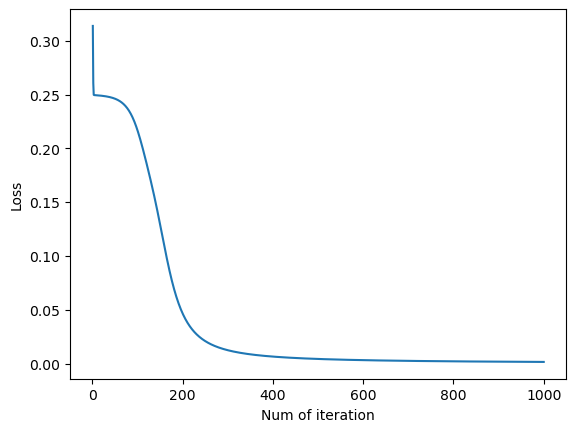

In [14]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1,len(loss_lst)+1),loss_lst)
plt.xlabel('Num of iteration')
plt.ylabel('Loss');